In [37]:
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install pickle-mixin

In [38]:
!pip install imblearn

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [40]:
data = pd.read_csv('Churn_Modelling.csv',decimal=',')

In [41]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.8,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.1,0


In [42]:
data.shape

(10000, 14)

In [43]:
data.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000,10000.000000,10000.00000,10000.000000,10000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,6382,NaN,NaN,NaN,9999,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,0,NaN,NaN,NaN,24924.92,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,3617,NaN,NaN,NaN,2,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,NaN,1.530200,0.70550,0.515100,NaN,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,NaN,0.581654,0.45584,0.499797,NaN,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,NaN,1.000000,0.00000,0.000000,NaN,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,NaN,1.000000,0.00000,0.000000,NaN,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,NaN,1.000000,1.00000,1.000000,NaN,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,NaN,2.000000,1.00000,1.000000,NaN,0.000000


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   RowNumber        10000 non-null  int64 
 1   CustomerId       10000 non-null  int64 
 2   Surname          10000 non-null  object
 3   CreditScore      10000 non-null  int64 
 4   Geography        10000 non-null  object
 5   Gender           10000 non-null  object
 6   Age              10000 non-null  int64 
 7   Tenure           10000 non-null  int64 
 8   Balance          10000 non-null  object
 9   NumOfProducts    10000 non-null  int64 
 10  HasCrCard        10000 non-null  int64 
 11  IsActiveMember   10000 non-null  int64 
 12  EstimatedSalary  10000 non-null  object
 13  Exited           10000 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 1.1+ MB


In [45]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [76]:

np.shape(data['Surname'])
col1 = pd.get_dummies(data['Surname'], drop_first = True, dtype =np.int64)
data = pd.concat([data,col1],axis=1)
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,...,Zinachukwudi,Zito,Zotov,Zotova,Zox,Zubarev,Zubareva,Zuev,Zuyev,Zuyeva
0,1,15634602,Hargrave,619,France,Female,42,2,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,...,0,0,0,0,0,0,0,0,0,0
2,3,15619304,Onio,502,France,Female,42,8,159660.8,3,...,0,0,0,0,0,0,0,0,0,0
3,4,15701354,Boni,699,France,Female,39,1,0,2,...,0,0,0,0,0,0,0,0,0,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0,2,...,0,0,0,0,0,0,0,0,0,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,...,0,0,0,0,0,0,0,0,0,0
9997,9998,15584532,Liu,709,France,Female,36,7,0,1,...,0,0,0,0,0,0,0,0,0,0
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

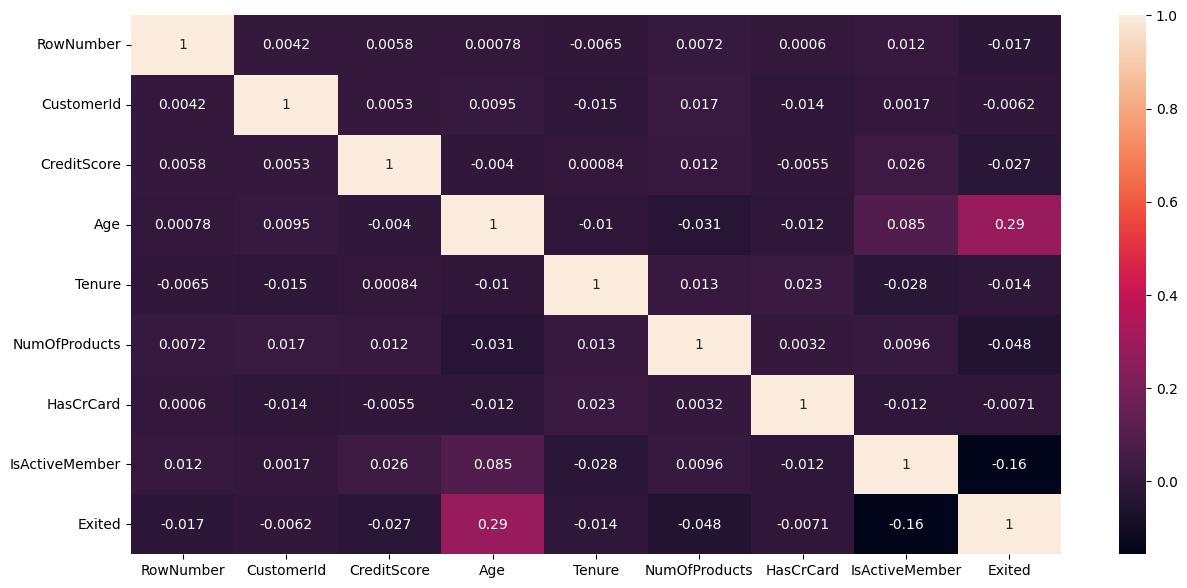

In [47]:
plt.figure(figsize = (15,7))
sns.heatmap(data.corr(), annot=True,fmt='.2g')

<AxesSubplot:xlabel='Exited', ylabel='count'>

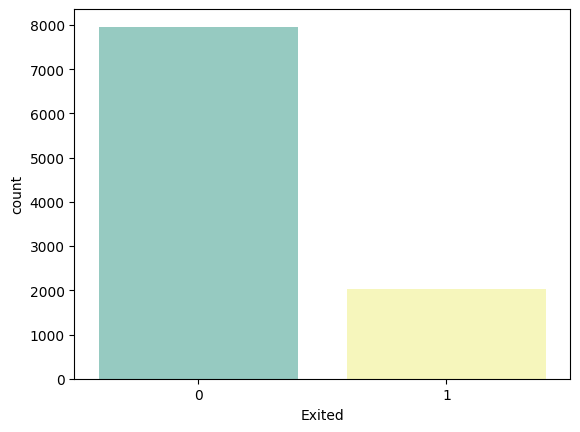

In [48]:
sns.countplot(x='Exited', palette="Set3", data=data)

#### Balancing the dataset

In [49]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


x = data.drop(['Exited'], axis=1)
y = data['Exited']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, shuffle=True, stratify=y)


param_grid = {'max_depth': [3, 5, 6],'max_features': [2, 4, 6],'n_estimators':[50, 100],'min_samples_split': [3, 5, 7]}
random_forest = RandomForestClassifier()
random_forest_grid = GridSearchCV(random_forest, param_grid, cv=5, refit=True, verbose=3, n_jobs=-2)
random_forest_grid.fit(x, y)
####print_best_model(random_forest_grid)
print(random_forest_grid.best_params_)
print(random_forest_grid.best_score_)

best_rf_estimator = RandomForestClassifier(max_depth=5, 
                                           max_features=6, 
                                           min_samples_split=7, 
                                           n_estimators=100)

best_rf_estimator.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


ValueError: 
All the 270 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
54 fits failed with the following error:
Traceback (most recent call last):
  File "d:\pacakges\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\pacakges\envs\tensorflow\lib\site-packages\sklearn\ensemble\_forest.py", line 331, in fit
    X, y = self._validate_data(
  File "d:\pacakges\envs\tensorflow\lib\site-packages\sklearn\base.py", line 596, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "d:\pacakges\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 1074, in check_X_y
    X = check_array(
  File "d:\pacakges\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 856, in check_array
    array = np.asarray(array, order=order, dtype=dtype)
  File "d:\pacakges\envs\tensorflow\lib\site-packages\pandas\core\generic.py", line 2064, in __array__
    return np.asarray(self._values, dtype=dtype)
ValueError: could not convert string to float: 'MacDonald'

--------------------------------------------------------------------------------
216 fits failed with the following error:
Traceback (most recent call last):
  File "d:\pacakges\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\pacakges\envs\tensorflow\lib\site-packages\sklearn\ensemble\_forest.py", line 331, in fit
    X, y = self._validate_data(
  File "d:\pacakges\envs\tensorflow\lib\site-packages\sklearn\base.py", line 596, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "d:\pacakges\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 1074, in check_X_y
    X = check_array(
  File "d:\pacakges\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 856, in check_array
    array = np.asarray(array, order=order, dtype=dtype)
  File "d:\pacakges\envs\tensorflow\lib\site-packages\pandas\core\generic.py", line 2064, in __array__
    return np.asarray(self._values, dtype=dtype)
ValueError: could not convert string to float: 'Hargrave'


In [ ]:
rf_predict_test = best_rf_estimator.predict(X_test)
accuracy_score(y_test, rf_predict_test)
print(classification_report(y_test, rf_predict_test))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.80      0.42      0.55       407

    accuracy                           0.86      2000
   macro avg       0.84      0.69      0.73      2000
weighted avg       0.85      0.86      0.84      2000



In [ ]:
#####import scipy
#####import sklearn
#####from sklearn.neighbors import LocalOutlierFactor
#####from sklearn.ensemble import IsolationForest
#####from sklearn.svm import OneClassSVM
#####from pylab import rcParams
#####from collections import Counter

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
columns = data.columns.tolist()
columns = [c for c in columns if c not in ['Exited']]
target = 'Exited'
state = np.random.RandomState(42)
X = data[columns]
Y = data[target]
print(X.shape)
print(Y.shape)

(10000, 13)
(10000,)


In [ ]:
churn = data[data['Exited']==1]
stay = data[data['Exited']==0]

In [ ]:
oversample = SMOTE()
X_res, Y_res = oversample.fit_resample(X, Y)

In [ ]:
X.shape, Y.shape

((10000, 13), (10000,))

In [ ]:
X_res.shape, Y_res.shape

((15926, 13), (15926,))

In [ ]:
from collections import Counter
print('Original dataset shape{}'.format(Counter(Y)))
print('reshaped dataset shape{}'.format(Counter(Y_res)))

Original dataset shapeCounter({0: 7963, 1: 2037})
reshaped dataset shapeCounter({1: 7963, 0: 7963})


In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_res, Y_res, test_size=0.20, shuffle=True, stratify=Y_res)


param_grid1 = {'max_depth': [3, 5, 6],'max_features': [2, 4, 6],'n_estimators':[50, 100],'min_samples_split': [3, 5, 7]}
random_forest1 = RandomForestClassifier()
random_forest_grid1 = GridSearchCV(random_forest, param_grid, cv=5, refit=True, verbose=3, n_jobs=-2)
random_forest_grid1.fit(X_res, Y_res)
####print_best_model(random_forest_grid)
print(random_forest_grid1.best_params_)
print(random_forest_grid1.best_score_)

best_rf_estimator1 = RandomForestClassifier(max_depth=5, 
                                           max_features=6, 
                                           min_samples_split=7, 
                                           n_estimators=100)

best_rf_estimator1.fit(X_train1, y_train1)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
{'max_depth': 3, 'max_features': 2, 'min_samples_split': 5, 'n_estimators': 100}
0.6504565007228446


RandomForestClassifier(max_depth=5, max_features=6, min_samples_split=7)

In [ ]:
rf_predict_test1 = best_rf_estimator1.predict(X_test1)
accuracy_score(y_test1, rf_predict_test1)
print(classification_report(y_test1, rf_predict_test1))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81      1593
           1       0.82      0.78      0.80      1593

    accuracy                           0.81      3186
   macro avg       0.81      0.81      0.81      3186
weighted avg       0.81      0.81      0.81      3186

